In [1]:
%matplotlib notebook

from os import listdir
from os.path import join
from operator import methodcaller
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from scipy import signal


runs = filter(methodcaller('endswith', '.run'), listdir())
data = {}


def load_file(directory, type):
    print("Loading {} from {}".format(type, directory))
    file = join(r, r[0:-3]) + type + ".csv"
    data = [line.strip().split(",")[0:-1] for line in open(file).readlines()]
    keys = data[0]
    result = defaultdict(list)
    for values in data[1:-1]:
        for i in range(len(keys)):
            if keys[i] == "WorkoutActive":
                result[keys[i]].append(bool(values[i]))
            elif keys[i] in ["Timestamp", "_ID"]:
                result[keys[i]].append(int(values[i]))
            else:
                result[keys[i]].append(float(values[i]))    
    return result


for r in runs:
    date = r.split('_')[0]
    data[date] = {}
    for type in ["Footpod", "Heart", "Loc", "MA"]:
        data[date][type] = load_file(r, type)
        begin = int(min(data[date][type]['Timestamp']))
        data[date][type]['x'] = [int(t) - begin for t in data[date][type]['Timestamp']]
print(data["20160416"]["Heart"]["Heartrate"][-10:-1])

Loading Footpod from 20160416_164348_54.run
Loading Heart from 20160416_164348_54.run
Loading Loc from 20160416_164348_54.run
Loading MA from 20160416_164348_54.run
Loading Footpod from 20160312_181056_47.run
Loading Heart from 20160312_181056_47.run
Loading Loc from 20160312_181056_47.run
Loading MA from 20160312_181056_47.run
Loading Footpod from 20160408_182525_52.run
Loading Heart from 20160408_182525_52.run
Loading Loc from 20160408_182525_52.run
Loading MA from 20160408_182525_52.run
[170.0, 170.0, 170.0, 169.0, 168.0, 168.0, 167.0, 167.0, 166.0]


<IPython.core.display.Javascript object>


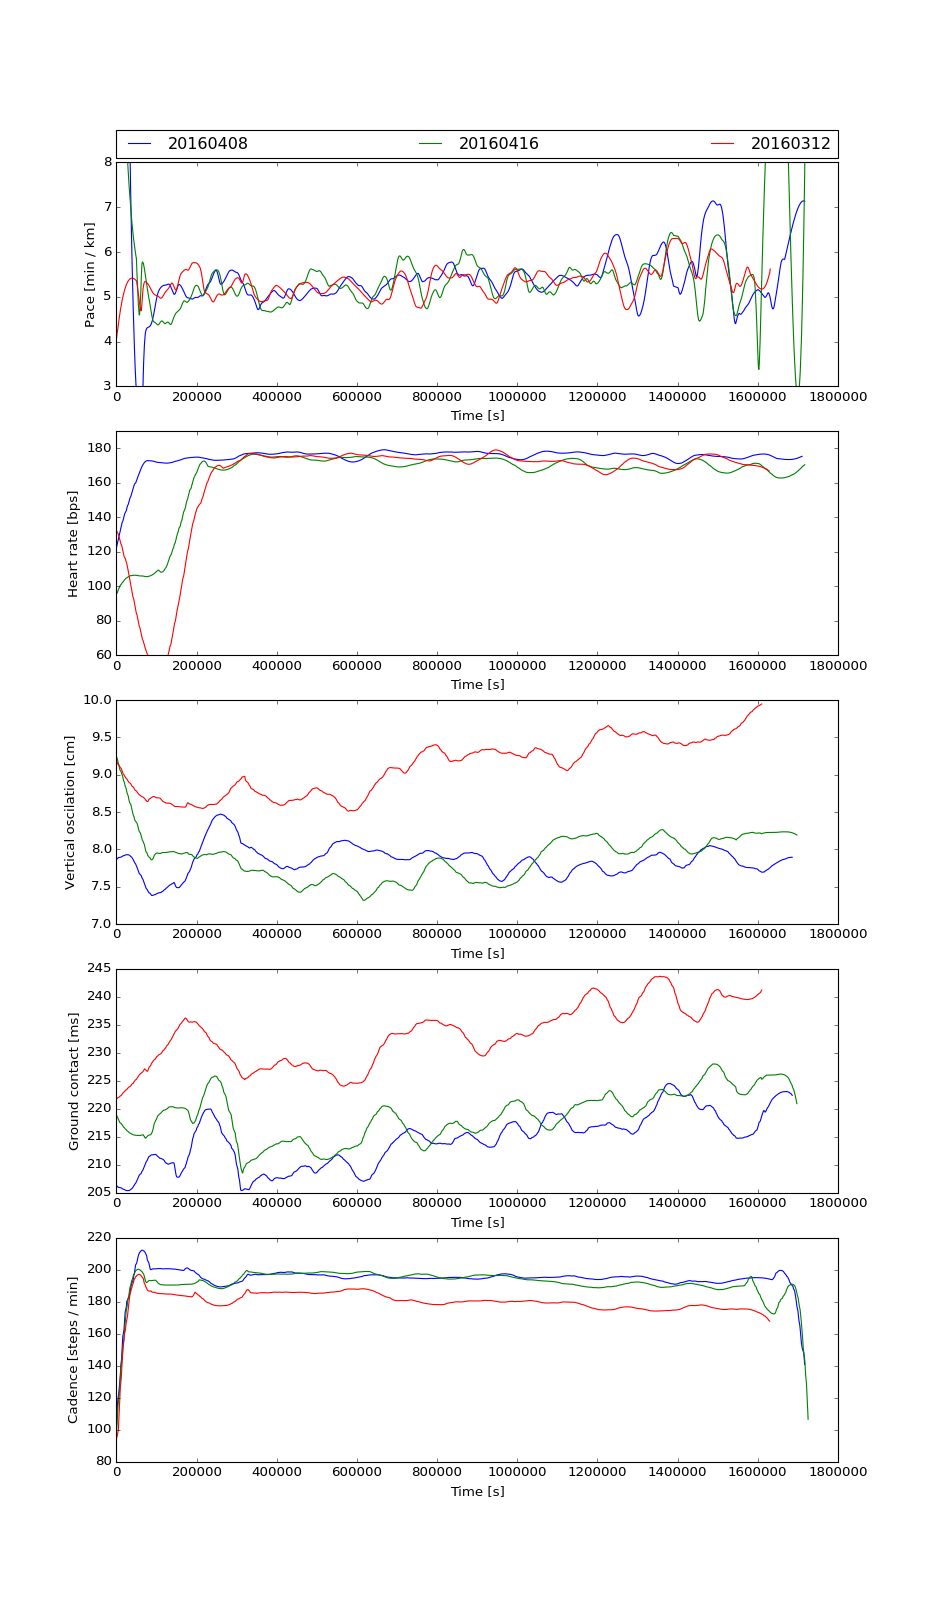

In [10]:


oscilations = {'label': "Vertical oscilation [cm]"}
contacts = {'label': "Ground contact [ms]"}
cadences = {'label': "Cadence [steps / min]"}
hearts = {'label': "Heart rate [bps]",
          'ymax': 190, 'ymin': 60.0}
speeds = {'label': "Pace [min / km]",
          'ymax': 8.0, 'ymin': 3.0}

for date, v in data.items():
    oscilations[date] = [v['MA']['x'], v['MA']['VerticalOscillation']]
    contacts[date] = [v['MA']['x'], v['MA']['GroundContactTime']]
    cadences[date] = [v['Footpod']['x'], v['Footpod']['Cadence']]
    hearts[date] = [v['Heart']['x'], v['Heart']['Heartrate']]
    speeds[date] = [v['Loc']['x'], [1.0 / s * 50.0 / 3.0 for s in v['Loc']['Speed']]]


graphs = [speeds, hearts, oscilations, contacts, cadences]


legend = True
for i in range(len(graphs)):
    plt.subplot(100 * len(graphs) + 10 + (i + 1))
    
    plt.xlabel("Time [s]")
    plt.ylabel(graphs[i]['label'])
    del graphs[i]['label']
    if 'ymax' in graphs[i]:
        plt.ylim(ymax=graphs[i]['ymax'])
        del graphs[i]['ymax']
    if 'ymin' in graphs[i]:
        plt.ylim(ymin=graphs[i]['ymin'])
        del graphs[i]['ymin']
    for date, params in graphs[i].items():
        plt.plot(params[0], signal.savgol_filter(params[1], 101, 3), label=date)

    if legend:
        legend = False
        plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
                   ncol=3, mode="expand", borderaxespad=0.)

        
plt.show()